In [35]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
cd 'drive/MyDrive/projetFinalMS2-DIC2GIT/'

[Errno 2] No such file or directory: 'drive/MyDrive/projetFinalMS2-DIC2GIT/'
/content/drive/MyDrive/projetFinalMS2-DIC2GIT


In [76]:
import pandas as pd
import numpy as np
#####for plot#######
from matplotlib import pyplot
import seaborn as sns
import datetime
###for the model#############
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import scale
from sklearn import set_config 

In [38]:
data = pd.read_csv("final_dataset.csv",sep=",")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [39]:
data.head()

,CustomerType,ArrivalTime,QueueSize,wl_30175,wl_30560,wl_30172,wl_30181,wl_30179,wl_30066,wl_30241,wl_others,NbAgents,LES,WaitingTime
0,30175,115401.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
1,30560,115477.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0
2,30175,115687.0,0,0,0,0,0,0,0,0,0,2,0.0,0.0
3,30175,115758.0,0,0,0,0,0,0,0,0,0,5,0.0,0.0
4,30175,115750.0,0,0,0,0,0,0,0,0,0,4,0.0,0.0


In [40]:
data.shape

(1463414, 14)

Nous avons un dataset de 1 463 414 lignes et 14 colonnes.

In [41]:
data.isnull().sum()

CustomerType    0
ArrivalTime     0
QueueSize       0
wl_30175        0
wl_30560        0
wl_30172        0
wl_30181        0
wl_30179        0
wl_30066        0
wl_30241        0
wl_others       0
NbAgents        0
LES             0
WaitingTime     0
dtype: int64

il n'ya pas de données manquantes dans nos données.

In [42]:
data.nunique()

CustomerType        48
ArrivalTime     947480
QueueSize          165
wl_30175           167
wl_30560            87
wl_30172            62
wl_30181           105
wl_30179            29
wl_30066            19
wl_30241            14
wl_others           32
NbAgents           272
LES               1530
WaitingTime       1772
dtype: int64

In [43]:
data = data.loc[data.CustomerType != 'CustomerType']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


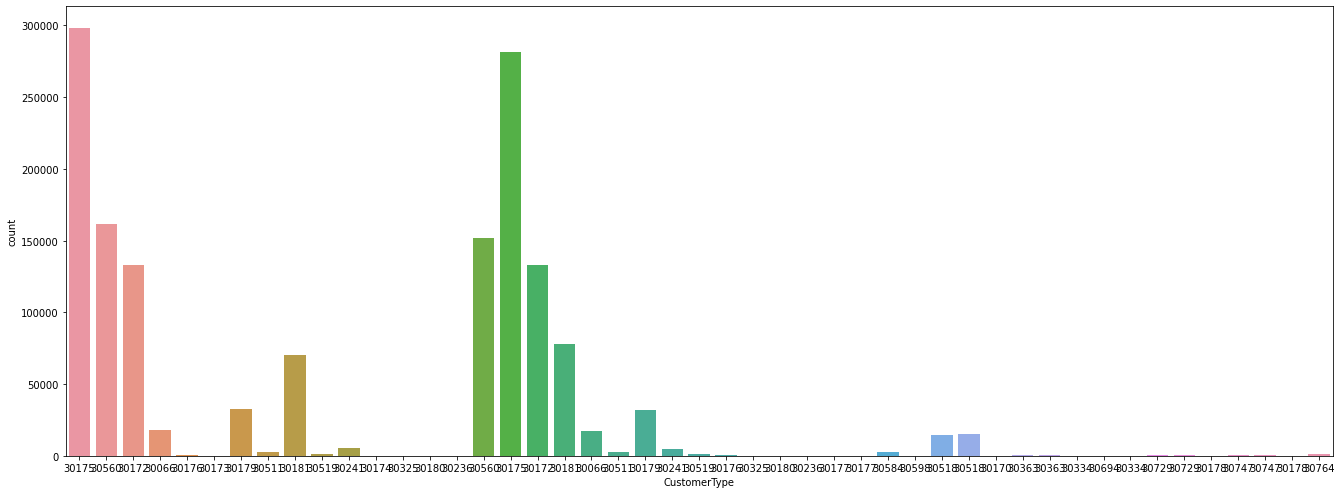

In [44]:
a4_dims = (22.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(data.CustomerType)

Traçons l'evolution de la longueur des queues en fonction des arrivées

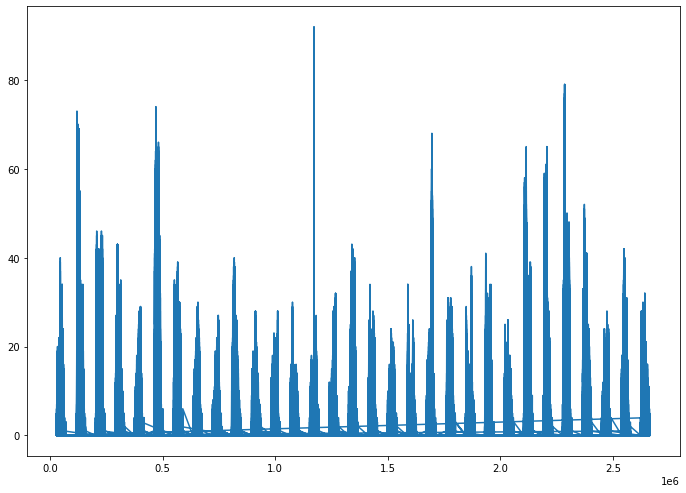

In [49]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
pyplot.plot(data['ArrivalTime'],data['QueueSize'])

In [56]:
X = data.loc[:, data.columns != 'WaitingTime'].values
y = data.WaitingTime.values

In [60]:
X = scale(X)
y = scale(y)
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.20)

In [70]:
set_config(print_changed_only=False) 
rfr = RandomForestRegressor(max_depth=25,random_state=42)
print(rfr)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)


In [71]:
rfr.fit(xtrain, ytrain)

score = rfr.score(xtrain, ytrain)
print("R-squared:", score) 

R-squared: 0.9922644593924798


In [73]:
ypred = rfr.predict(xtest)

mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

MSE:  0.04350740701369126
RMSE:  0.02175370350684563


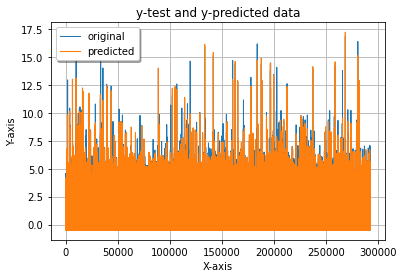

In [74]:
x_ax = range(len(ytest))
pyplot.plot(x_ax, ytest, linewidth=1, label="original")
pyplot.plot(x_ax, ypred, linewidth=1.1, label="predicted")
pyplot.title("y-test and y-predicted data")
pyplot.xlabel('X-axis')
pyplot.ylabel('Y-axis')
pyplot.legend(loc='best',fancybox=True, shadow=True)
pyplot.grid(True)
pyplot.show()